In [1]:
"""
A directed acyclic word graph (DAWG) is a data structure that represents a set of strings, often used as a compact way to store a dictionary.
Each word starts from the source node and ends at the sink node.
In between the source and sink is a network of nodes, connected by directed edges labeled either with a letter or as EOW (end-of-word) when connecting to the sink.
Each node has at most one outgoing edge for each letter or EOW.
Following every possible path from the source node to the sink node gives you the list of words in the dictionary.

Given a set of strings, determine the minimum number of nodes needed to store them in a DAWG.
A graph for the example can be found here: https://en.wikipedia.org/wiki/Deterministic_acyclic_finite_state_automaton

Input
Line 1: The number of words N
Next N lines: The word list
Output
The number of nodes needed

Example 
Input
4
tap
taps
top
tops
Output
6
"""
# Visualize the graph 
import networkx as nx
import matplotlib.pyplot as plt
import os

In [2]:
# Node class
class Node:
    def __init__(self,  ):
        self.name = name
        self.children = {}
        self.is_end_of_word = False
        self.count = 0

    def add_child(self, char, child):
        self.children[char] = child

In [3]:
# DAFSA class
class DAFSA:
    def __init__(self):
        self.root = Node('')
        self.node_count = 1
    
    def add_word(self, word):
        current_node = self.root
        for char in word:
            if char in current_node.children:
                current_node = current_node.children[char]
            else:
                new_node = Node(char)
                current_node.add_child(char, new_node)
                current_node = new_node
                self.node_count += 1
        current_node.is_end_of_word = True

    def get_node_count(self):
        return self.node_count
    
    def get_root(self):
        return self.root
    
    def compress(self):
        self.compress_node(self.root)
    
    def compress_node(self, node):
        for child in node.children:
            self.compress_node(node.children[child])
        if node.is_end_of_word and len(node.children) == 1:
            child = list(node.children.values())[0]
            node.name += child.name
            node.children = child.children
            node.is_end_of_word = child.is_end_of_word
            self.node_count -= 1

In [4]:
# Visualize the graph
def visualize_graph(root):
    G = nx.DiGraph()
    G.add_node(root.name)
    visualize_graph_helper(G, root)
    nx.draw(G, with_labels=True)
    plt.savefig("graph.png")
    plt.show()

def visualize_graph_helper(G, node):
    for child in node.children.values():
        G.add_node(child.name)
        G.add_edge(node.name, child.name)
        visualize_graph_helper(G, child)


8


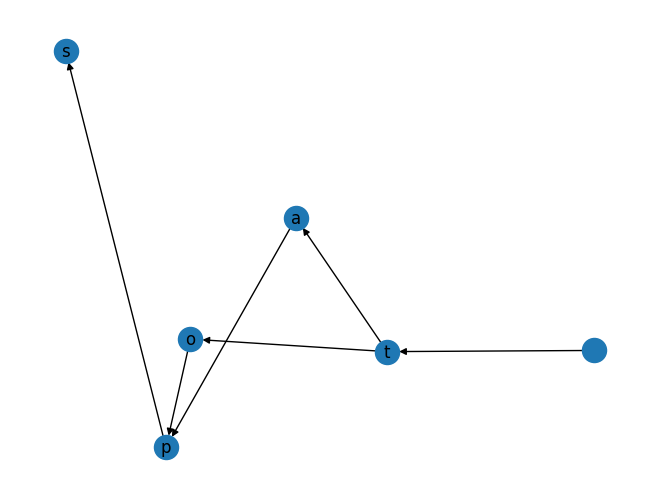

In [5]:
# Main
n = 4
d = DAFSA()
wlist = ['tap', 'taps', 'top', 'tops']
for i in wlist:
    d.add_word(i)
print(d.get_node_count())
visualize_graph(d.get_root())

417


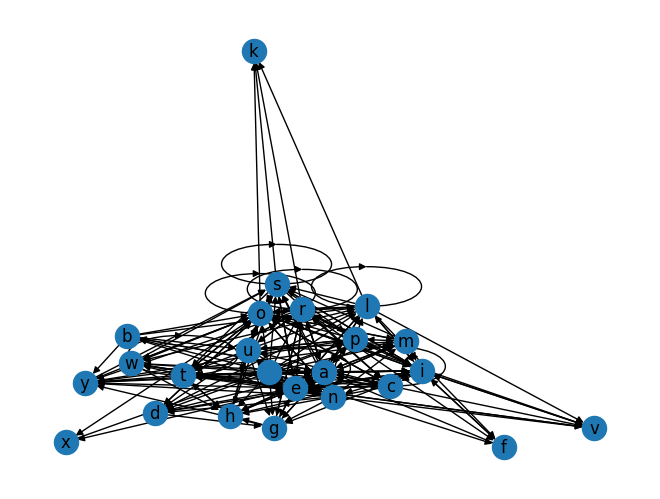

In [9]:
n = 100
d = DAFSA()
words = ['action', 'against', 'also', 'always', 'anyone', 'arrive', 'baby', 'bad', 'base', 'become', 'behavior', 'better', 'blood', 'box', 'budget', 'by', 'camera', 'can', 'car', 'center', 'certain', 'charge', 'computer', 'cover', 'create', 'current', 'deal', 'degree', 'detail', 'direction', 'discuss', 'doctor', 'eight', 'energy', 'environment', 'everyone', 'explain', 'factor', 'field', 'final', 'finger', 'fire', 'generation', 'get', 'hang', 'history', 'hot', 'human', 'if', 'into', 'leave', 'legal', 'light', 'long', 'look', 'lot', 'love', 'man', 'method', 'military', 'million', 'modern', 'moment', 'move', 'myself', 'network', 'newspaper', 'note', 'now', 'occur', 'oil', 'own', 'party', 'practice', 'relationship', 'report', 'role', 'run', 'simple', 'southern', 'surface', 'talk', 'task', 'than', 'themselves', 'tough', 'trial', 'type', 'upon', 'us', 'walk', 'west', 'whole', 'wonder', 'world', 'worry', 'would', 'yeah', 'year', 'yet']
for i in words:
    d.add_word(i)
print(d.get_node_count())
visualize_graph(d.get_root())